In [3]:
%pylab inline
from autocnet_server.graph.graph import NetworkCandidateGraph
import time
%load_ext line_profiler

Populating the interactive namespace from numpy and matplotlib


In [4]:
ncg = NetworkCandidateGraph.from_database()

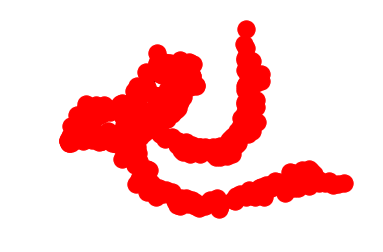

In [5]:
ncg.plot()

In [3]:
# This will take a moment and hit the DB pretty hard. TODO in to optimize.
etp = ncg.unmatched_edges

In [4]:
len(etp)

390

In [3]:
ncg.ring_match(etp)

True

In [5]:
len(ncg.processing_queue), len(ncg.completed_queue)
#ncg.ring_match()

(0, 0)

In [4]:
for

,id,source,source_idx,destination,destination_idx,lat,lon,geom,source_x,source_y,destination_x,destination_y
0,285,5,28149,6,295765,7.172132,152.582038,01010000a08c7e0e001b09ad0da01263408530c75443b0...,3122.759766,457.635284,828.672974,19984.097656
1,286,5,31851,6,301435,7.455224,152.493515,01010000a08c7e0e007fc13fe0ca0f63402c31903b26d2...,2542.366943,3322.917725,245.983917,22848.921875
2,287,5,14352,6,355137,7.677463,152.468749,01010000a08c7e0e0058db64fdff0e634093e760c7b8b5...,2566.454834,5518.819824,271.303925,25043.179688
3,288,5,18317,6,269072,7.231997,152.522064,01010000a08c7e0e00b1ba9cbeb41063408c4a8f8590ed...,2556.710938,1112.703857,257.489929,20638.638672
4,289,5,46476,6,338068,7.209752,152.530612,01010000a08c7e0e005e9ca6c6fa106340813a5325c9d6...,2619.464600,885.643494,320.527191,20412.406250
5,290,5,39930,6,398746,7.648672,152.459719,01010000a08c7e0e00ba62a104b60e6340a614f6733d98...,2431.934814,5249.185059,133.500305,24772.130859
6,291,5,43321,6,404172,7.610670,152.481565,01010000a08c7e0e00647887fa680f63404eeb1b5a5371...,2616.661377,4852.459961,322.158447,24377.230469
7,292,5,49052,6,344298,7.513342,152.487022,01010000a08c7e0e00885ae8ae950f6340afedef83a90d...,2548.130127,3897.242920,246.049072,23425.371094
8,293,5,46871,6,338588,7.377368,152.506696,01010000a08c7e0e005e463eda36106340529941cd6c82...,2582.485596,2548.480469,281.705750,22077.441406
9,294,5,39479,6,397604,7.585266,152.468296,01010000a08c7e0e000158b448fc0e63401b7026f74f57...,2441.334229,4620.482910,142.940231,24145.248047


In [29]:
e['ring']

KeyError: 'ring'

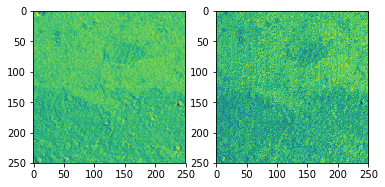

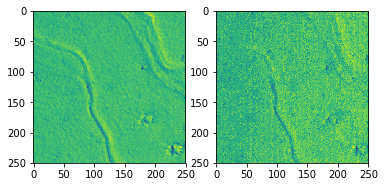

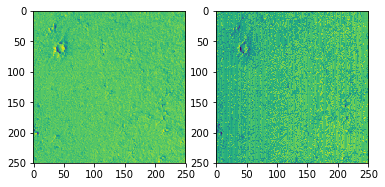

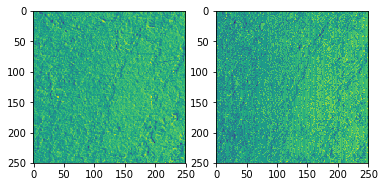

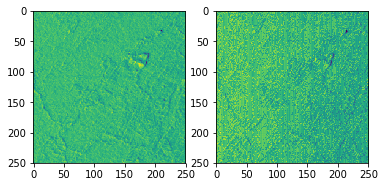

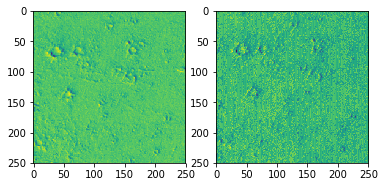

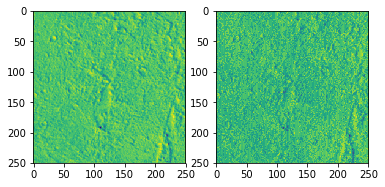

In [30]:
s = 594
d = 616

e = ncg.edges[(s,d)]['data']
e.matches

for i in range(1,8):
    r = e.matches.iloc[i]
    fig, (ax1, ax2) = plt.subplots(1,2)
    a = ncg.node[s]['data'].geodata.read_array(pixels=[r.source_x-125, r.source_y-125, 250, 250])
    ax1.imshow(a)
    b = ncg.node[d]['data'].geodata.read_array(pixels=[r.destination_x-125, r.destination_y-125, 250, 250])
    ax2.imshow(b)
    show()

In [ ]:
sidx = e.matches.source_idx.values.tolist()
didx = e.matches.destination_idx.values.tolist()

skps = ncg.node[s]['data'].get_keypoints(index=sidx)
dkps = ncg.node[d]['data'].get_keypoints(index=didx)

def apply_plot(r, a,b):
    fig, (ax1, ax2) = plt.subplots(1,2)
    ax1.imshow(a[int(r.source_y-50):int(r.source_y+50),int(r.source_x-50):int(r.source_x+50)], cmap='Greys')
    ax2.imshow(b[int(r.destination_y-50):int(r.destination_y+50),int(r.destination_x-50):int(r.destination_x+50)], cmap='Greys')

    return fig

for i in range(len(sidx)):
    akp = skps.iloc[i].astype(int)
    bkp = dkps.iloc[i].astype(int)
    #print(akp, bkp)
    c
    fig.show()
    break

In [8]:
e.matches

AttributeError: 'float' object has no attribute 'matches'

In [12]:
n = ncg.node[930]['data']
print(n.geodata.footprint)

None


In [7]:
32768 * 5000


163840000